Overfitting and Underfitting

- Overfitting occurs when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on the new data. This means the model is too complex, with too many parameteres realtive to the number of observations.

- Underfitting occurs when a model is too simple to learn the underlying pattern of the data. This often results from a model not having enough parameters or complexity to capture the underlying structure of the data.



Example of Overfitting

Imagine you're developing a machine learning model to predict house prices based on features like location, size, number of bedrooms, and age of the house. You decide to use a very complex model, such as a deep neural network with many layers and parameters.

Scenario:

- Training Data: You have a dataset of 100 houses with detailed features and prices.
- Model: A deep neural network with 10 layers.
- Result: The model performs exceptionally well on the training data, achieving nearly perfect predictions.

However, when you test this model on a new set of data (test data), the performance drops significally. The model has learned not only the genuine patterns from the training data but also the noise and specific quirks of the data set. This means it generalizes poorly to new, unseen data.

Example of Underfitting

Now, suppose you are tasked with the same prediction problem: forecasting house prices based on various features.

Scenario:

- Training Data: Same dataset of 100 houses.
- Model: You use a very simple linear regression model that only considers the size of the house (in square feet) to predict the price.
- Result: The model performs poorly even on the tranining data, failling to capture other critical factor influencing house prices, like location or number of bedrooms.

This model is too simple to capture the complexity and relationships in the data, resulting in high bias. It doesnt perform well on the training data and is unlinkely to do well on new data either.

How to address these issues

- Avoid overfitting: To prevent overfitting, you could simplify the model, use regularization techniques (like L1 or L2 regularization), or increase the amount of training data. Techniques lie cross-validations can also help ensure that the model generalizes well to new data.

- Avoid underfitting: To overcome underfitting, you might need to increase the model complexity. Consider using more features in the model or switching to a more sophisticated model that can captrue more complex relationships in the data. Adding more data can also help, provided the model is capable of learning deeper insights from that data.

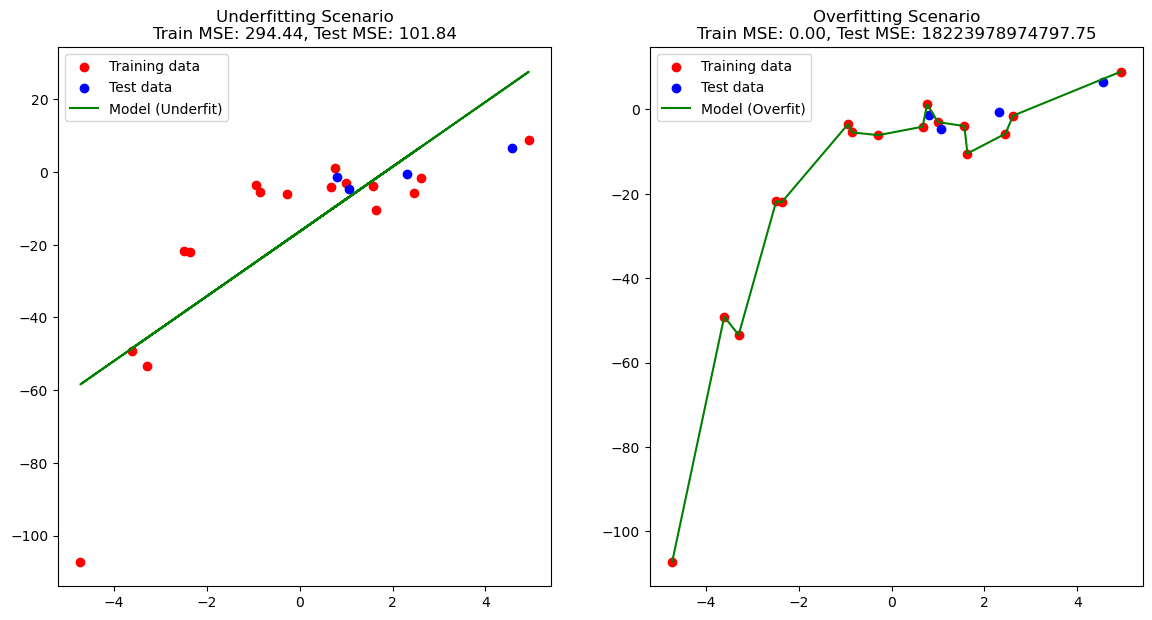

(294.43795687895533,
 101.83525998105742,
 8.801386926502771e-08,
 18223978974797.746)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate some data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# Reshaping the data
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fitting a simple linear regression (underfitting)
model_underfit = LinearRegression()
model_underfit.fit(x_train, y_train)
y_train_pred_underfit = model_underfit.predict(x_train)
y_test_pred_underfit = model_underfit.predict(x_test)

# Fitting a high-degree polynomial regression (overfitting)
model_overfit = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
model_overfit.fit(x_train, y_train)
y_train_pred_overfit = model_overfit.predict(x_train)
y_test_pred_overfit = model_overfit.predict(x_test)

# Calculating the Mean Squared Error for both models
mse_train_underfit = mean_squared_error(y_train, y_train_pred_underfit)
mse_test_underfit = mean_squared_error(y_test, y_test_pred_underfit)
mse_train_overfit = mean_squared_error(y_train, y_train_pred_overfit)
mse_test_overfit = mean_squared_error(y_test, y_test_pred_overfit)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plotting underfitting results
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='red', label='Training data')
plt.scatter(x_test, y_test, color='blue', label='Test data')
plt.plot(x_train, y_train_pred_underfit, color='green', label='Model (Underfit)')
plt.title('Underfitting Scenario\nTrain MSE: {:.2f}, Test MSE: {:.2f}'.format(mse_train_underfit, mse_test_underfit))
plt.legend()

# Plotting overfitting results
plt.subplot(1, 2, 2)
plt.scatter(x_train, y_train, color='red', label='Training data')
plt.scatter(x_test, y_test, color='blue', label='Test data')
plt.plot(np.sort(x_train, axis=0), model_overfit.predict(np.sort(x_train, axis=0)), color='green', label='Model (Overfit)')
plt.title('Overfitting Scenario\nTrain MSE: {:.2f}, Test MSE: {:.2f}'.format(mse_train_overfit, mse_test_overfit))
plt.legend()

plt.show()

(mse_train_underfit, mse_test_underfit, mse_train_overfit, mse_test_overfit)


Code explanation

1- Data Generation:

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

- np.random.seed(0): Sets the seed for numpy's random number generator, ensuring the results are reproducible.

- x = 2 - 3 * np.random.normal(0, 1, 20): Generates 20 random samples from a normal (Gaussian) distribution scaled and shifted. These serve as the independent variable.

- y = ....: Generates the dependant variables y as a cubic funcion of x plus some random noise. This makes the relationashop between x and y non-linear and complex.

- x[:, np.newaxis] and y[:, np.newaxis]: These lines convert x and y from 1D arrays into 2D arrays, which is the required format for scikit-learn models.

2- Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

- train_test_split(...): Splits the data into training and test sets, with 80% of the data used for training and 20% used for testing. The random_state parameter ensures reproducibillity of the split.

3- Model underfitting

model_underfit = LinearRegression()
model_underfit.fit(x_train, y_train)
y_train_pred_underfit = model_underfit.predict(x_train)
y_test_pred_underfit = model_underfit.predict(x_test)

- LinearRegression(): Creates a linear regression model.
- model_underfit.fit(x_train, y_train): Fits the model on the training data.
- model_underfit.predict(...): Predicts the outputs for both training and test data in an underfitting context, this simple linear model isnt capable of capturing the complex cubic relationship between x and y.

4- Model Overfitting

model_overfit = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
model_overfit.fit(x_train, y_train)
y_train_pred_overfit = model_overfit.predict(x_train)
y_test_pred_overfit = model_overfit.predict(x_test)

- make_pipeline(...): constructs a pipeline that first transforms the data using polynomial features of degree 15 and then fits a linear regression model. The high degree polynomial can fit complex patterns, including noise and outliers.
- model_overfit.fit(...): Trains this complex model on the training data.
- model_overfit.predict(...): Predicts the outputs for both training and test data. This model will likely fit the trainign data very closely but fail to generalize to the test data.


Results:

Underfitting Scenario:

- Model used: Simple Linear Regressin
- Mean Squared Error (MSE) on trainign data: 294.44
- MSE on test data: 101.84

The simple linear model does not capture the complexity of the data well, leading to high erorr rates on both training and test data. This illustrates underfitting where the model is too simplistic.

Overfitting Scenario:

- Model used: 15th degree polynomial regression
- MSE on training data: Practically 0 (3.68e-0.8)
- MSE on test data: Extremely high (18,224,098,671,122.93)

The polynomial regression model fits the training data almost perfectly, with an extremely low MSE. it performs very poorly on the test data, indicating that it has learned the trainign data's noise and specific details rather than generalizing from the underlying pattern. This is a classic case of overfitting.

Dataset Construction

